# Linear Regression

In [ ]:
import pandas as pd

# There is a warning as there is 1 extra column containing only 0 that does not have a header
df = pd.read_csv('../../data/stock_data.csv', index_col=False)
#df = df.iloc[:, :-1]
df.head()

C:\Users\Adwait\AppData\Local\Temp\ipykernel_9492\2658730901.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('../../data/stock_data.csv', index_col=False)


,timestamp,open,high,low,close,volume
0,2024-01-01T00:00:00+0530,1539.00,1557.00,1535.25,1551.35,2808451
1,2024-01-02T00:00:00+0530,1546.00,1549.15,1523.00,1534.40,5396313
2,2024-01-03T00:00:00+0530,1519.95,1519.95,1488.00,1490.00,7550363
3,2024-01-04T00:00:00+0530,1504.95,1519.75,1492.90,1512.70,7056038
4,2024-01-05T00:00:00+0530,1506.75,1539.70,1506.25,1532.55,8895403


In [15]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [16]:
df.shape


(344, 6)

In [17]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [ ]:
df.describe()

,open,high,low,close,volume
count,344.000000,344.000000,344.000000,344.000000,3.440000e+02
mean,1700.974273,1717.697965,1684.221948,1701.007849,7.121167e+06
std,182.374727,183.973302,180.509961,182.052915,4.125552e+06
min,1352.000000,1405.900000,1307.000000,1393.650000,2.921530e+05
25%,1525.225000,1535.862500,1505.937500,1525.575000,4.614136e+06
50%,1685.500000,1699.875000,1670.175000,1686.600000,6.299770e+06
75%,1875.362500,1893.125000,1860.250000,1875.612500,8.386537e+06
max,1995.450000,2006.450000,1977.600000,1999.700000,3.711382e+07


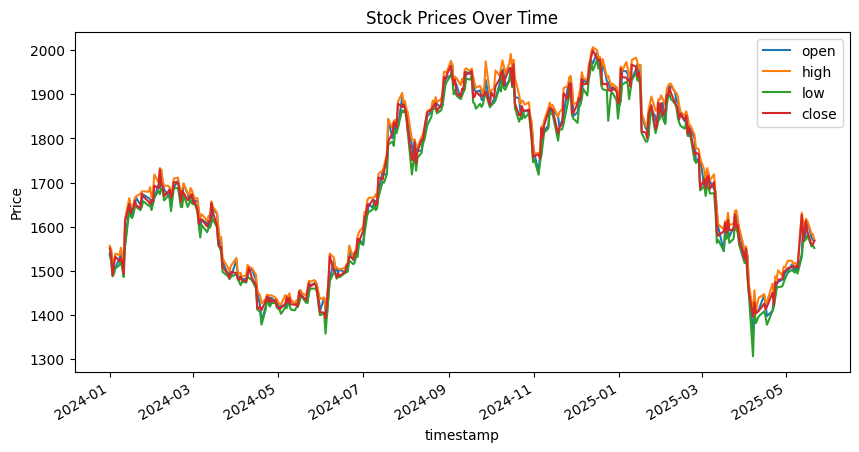

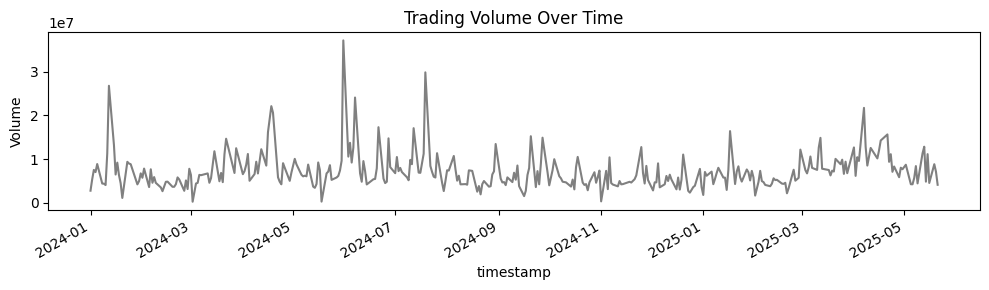

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Line plot for OHLC
df.set_index('timestamp')[['open', 'high', 'low', 'close']].plot(figsize=(10, 5))
plt.title('Stock Prices Over Time')
plt.ylabel('Price')
plt.show()

# Volume bar chart
df.set_index('timestamp')['volume'].plot(figsize=(10, 3), color='gray')
plt.title('Trading Volume Over Time')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

In [31]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R²: {r2:.2f}')

MSE: 76.07, R²: 1.00


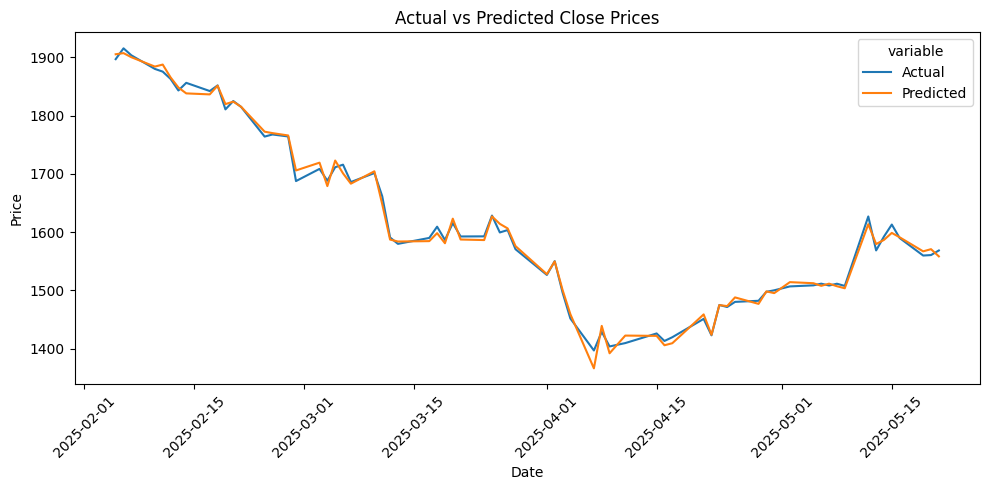

In [32]:
# Prepare comparison DataFrame
compare_df = pd.DataFrame({
    'timestamp': df['timestamp'].iloc[y_test.index],
    'Actual': y_test.values,
    'Predicted': y_pred
})

plt.figure(figsize=(10, 5))
sns.lineplot(x='timestamp', y='value', hue='variable',
             data=pd.melt(compare_df, ['timestamp'], var_name='variable'))
plt.title('Actual vs Predicted Close Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

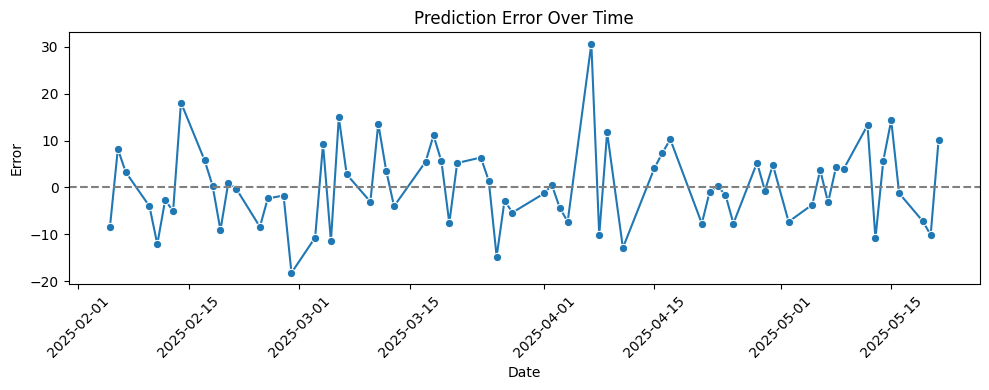

In [33]:
compare_df['Error'] = compare_df['Actual'] - compare_df['Predicted']

plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='Error', data=compare_df, marker='o')
plt.title('Prediction Error Over Time')
plt.ylabel('Error')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()